# AML - Exercise Sheet 11
## Exercise 2

In [3]:
from sklearn.datasets import load_digits
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [4]:
digits = load_digits()
X, y = digits.data, digits.target
X = X.reshape((X.shape[0], -1)) # Flattening 8x8 array into 64 array
y = np.where(y < 5, -1, 1)  # Reassign labels

# (a)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(f"{X_train.shape=}\t{y_train.shape=}\n{X_test.shape=}\t{y_test.shape=}")

X_train.shape=(1347, 64)	y_train.shape=(1347,)
X_test.shape=(450, 64)	y_test.shape=(450,)


In [6]:
def train_gradient_boosting(max_depth, n_estimators):
	"""Function to train Gradient Boosting and return errors"""
	train_errors = []
	test_errors = []
	for n in n_estimators:
		clf = GradientBoostingClassifier(max_depth=max_depth, n_estimators=n, random_state=0)
		clf.fit(X_train, y_train)
		train_errors.append(1 - accuracy_score(y_train, clf.predict(X_train)))
		test_errors.append(1 - accuracy_score(y_test, clf.predict(X_test)))
	return train_errors, test_errors

In [7]:
# Set a range for the number of estimators
n_estimators_range = np.arange(start=1, stop=50, step=1)

# Train with max_depth=1 and max_depth=3
train_errors_1, test_errors_1 = train_gradient_boosting(1, n_estimators_range)
train_errors_3, test_errors_3 = train_gradient_boosting(3, n_estimators_range)

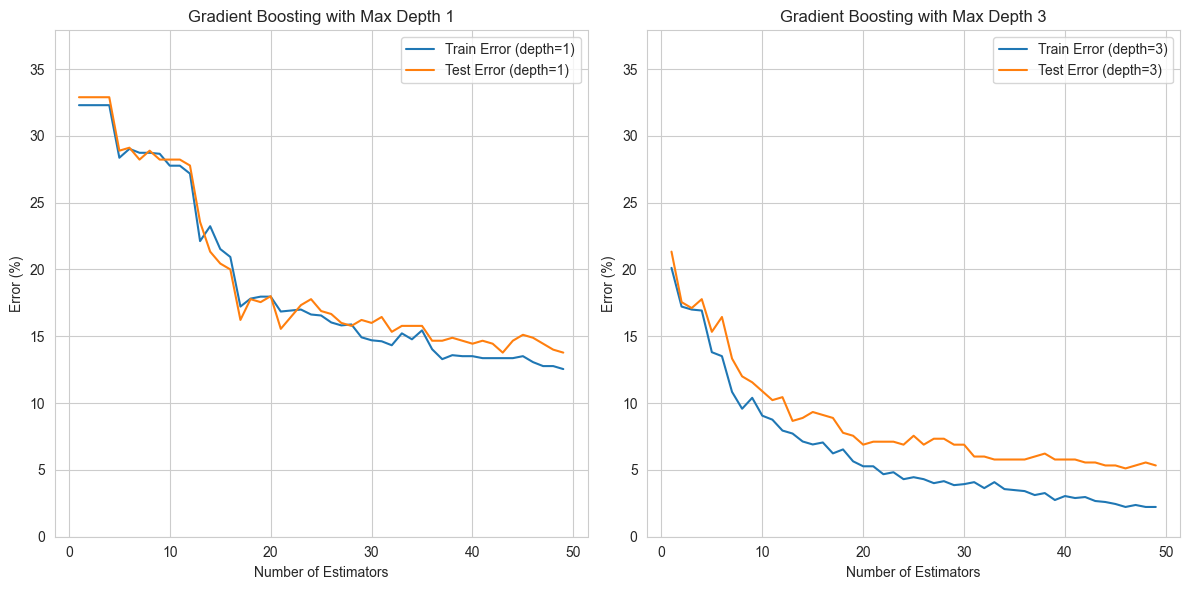

In [8]:
# Calculate the maximum error to set a common y-axis scale
pad = 5
max_error = min(max(train_errors_1 + test_errors_1 + train_errors_3 + test_errors_3) * 100 + pad, 100)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, np.array(train_errors_1) * 100, label='Train Error (depth=1)')
plt.plot(n_estimators_range, np.array(test_errors_1) * 100, label='Test Error (depth=1)')
plt.xlabel('Number of Estimators')
plt.ylabel('Error (%)')
plt.title('Gradient Boosting with Max Depth 1')
plt.legend()
plt.ylim([0, max_error])  # Synchronize y-axis

plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, np.array(train_errors_3) * 100, label='Train Error (depth=3)')
plt.plot(n_estimators_range, np.array(test_errors_3) * 100, label='Test Error (depth=3)')
plt.xlabel('Number of Estimators')
plt.ylabel('Error (%)')
plt.title('Gradient Boosting with Max Depth 3')
plt.legend()
plt.ylim([0, max_error])  # Synchronize y-axis

plt.tight_layout()
plt.show()

# (b)

In [9]:
clf = GradientBoostingClassifier(max_depth=1, n_estimators=10, random_state=0)
cv_scores = cross_val_score(clf, X, y, cv=KFold(n_splits=10, shuffle=True), scoring='accuracy')

In [10]:
print(f"Mean test error: {1 - np.mean(cv_scores):.3f} %")

Mean test error: 0.245 %


In [11]:
# Function to perform 10-fold cross-validation with Gradient Boosting
def evaluate_gradient_boosting(max_depth, n_estimators_range):
    average_test_errors = []
    for n in n_estimators_range:
        clf = GradientBoostingClassifier(max_depth=max_depth, n_estimators=n, random_state=0)
        cv_scores = cross_val_score(clf, X, y, cv=KFold(n_splits=10, shuffle=True), scoring='accuracy')
        average_test_error = 1 - np.mean(cv_scores)
        average_test_errors.append(average_test_error)
    return average_test_errors

In [12]:
n_estimators_range = np.arange(start=1, stop=20, step=1)

# Evaluate for different depths
errors_depth_1 = evaluate_gradient_boosting(max_depth=1, n_estimators_range=n_estimators_range)
errors_depth_3 = evaluate_gradient_boosting(max_depth=3, n_estimators_range=n_estimators_range)
errors_depth_5 = evaluate_gradient_boosting(max_depth=5, n_estimators_range=n_estimators_range)

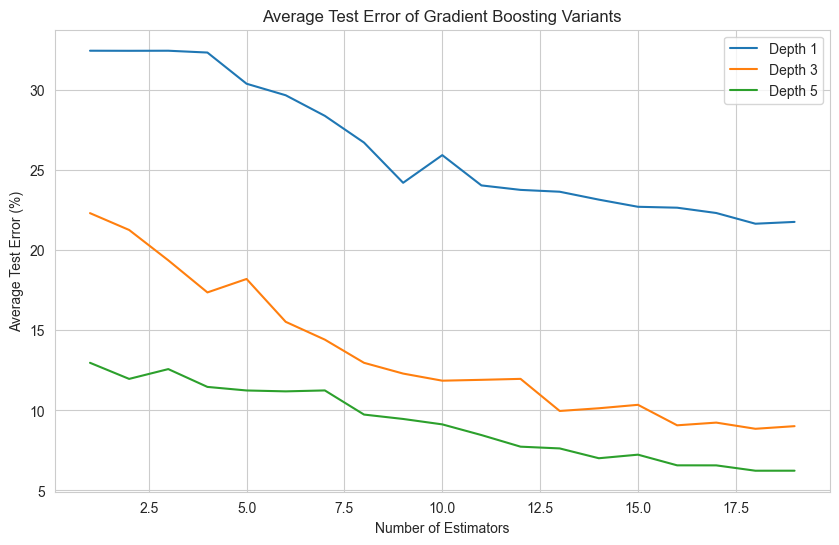

In [13]:
# Plotting the average test errors
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, np.array(errors_depth_1)*100, label='Depth 1')
plt.plot(n_estimators_range, np.array(errors_depth_3)*100, label='Depth 3')
plt.plot(n_estimators_range, np.array(errors_depth_5)*100, label='Depth 5')
plt.xlabel('Number of Estimators')
plt.ylabel('Average Test Error (%)')
plt.title('Average Test Error of Gradient Boosting Variants')
plt.legend()
plt.show()

# (c)

In [14]:
# Function to perform 10-fold cross-validation with Gradient Boosting
def evaluate_gradient_boosting(learning_rate, n_estimators_range):
    average_test_errors = []
    for n in n_estimators_range:
        clf = GradientBoostingClassifier(learning_rate=learning_rate, max_depth=5, n_estimators=n, random_state=0)
        cv_scores = cross_val_score(clf, X, y, cv=KFold(n_splits=10, shuffle=True), scoring='accuracy')
        average_test_error = 1 - np.mean(cv_scores)
        average_test_errors.append(average_test_error)
    return average_test_errors

In [21]:
n_estimators_range = np.arange(start=1, stop=20, step=1)
learning_rates = np.logspace(start=-4, stop=0, num=10)

# Call the function for each combination of learning_rate and n_estimators
results = {}
for lr in learning_rates:
    results[lr] = evaluate_gradient_boosting(lr, n_estimators_range)

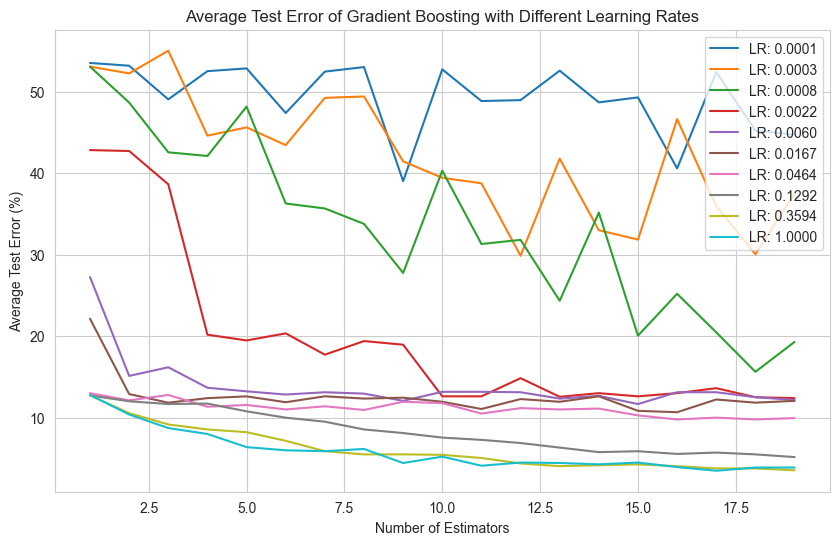

In [22]:
# Plotting the average test errors
plt.figure(figsize=(10, 6))

# Iterate through each learning rate and plot
for lr, errors in results.items():
    plt.plot(n_estimators_range, np.array(errors) * 100, label=f'LR: {lr:.4f}')

plt.xlabel('Number of Estimators')
plt.ylabel('Average Test Error (%)')
plt.title('Average Test Error of Gradient Boosting with Different Learning Rates')
plt.legend()
plt.show()